In [1]:
import tensorflow_datasets as tfds

2022-06-29 20:48:33.763388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-29 20:48:33.763462: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
ds_train = tfds.load('mnist', split = 'train', as_supervised = True)
def transform(f, l):
    return f/255, l
ds_train = ds_train.map(transform)

2022-06-29 20:48:39.116264: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".



Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


2022-06-29 20:48:43.849207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-29 20:48:43.849225: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-29 20:48:43.849237: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lucas): /proc/driver/nvidia/version does not exist
2022-06-29 20:48:43.849480: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
feature, _ = next(iter(ds_train.take(1)))

2022-06-29 20:48:52.756875: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


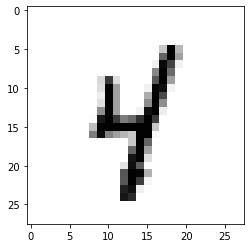

In [4]:
import matplotlib.pyplot as plt
plt.imshow(feature.numpy().reshape(28, 28), cmap = 'Greys')

In [5]:
feature.numpy().ravel()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

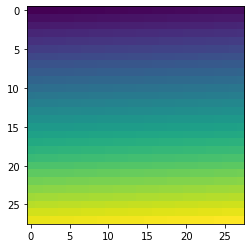

In [6]:
import numpy as np
imagem1 = np.arange(0, 784).reshape(28, 28)
plt.imshow(imagem1)

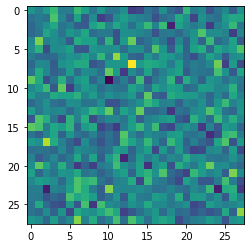

In [7]:
np.random.seed(42)
imagem2 = np.random.normal(size = 784).reshape(28, 28)
plt.imshow(imagem2)

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

tf.__version__

'2.9.0'

In [9]:
gerador = tf.keras.Sequential([
                               tf.keras.layers.Dense(units = 128, activation = 'relu'),
                               tf.keras.layers.Dense(units = 128, activation = 'relu'),
                               tf.keras.layers.Dense(units = 784, activation = 'tanh')
                               ])

In [10]:
ruido_teste = tf.random.uniform(shape = (1, 100), minval = -1, maxval = 1)
amostra = gerador(ruido_teste)

In [11]:
amostra.shape

TensorShape([1, 784])

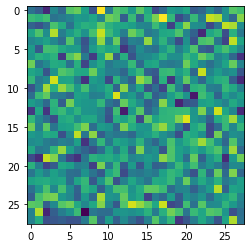

In [12]:
plt.imshow(amostra.numpy().reshape(28, 28))

In [13]:
discriminador = tf.keras.Sequential([
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 1)
                                     ])

In [14]:
features, _ = next(iter(ds_train.batch(100)))
features.shape

2022-06-29 20:49:25.140663: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


TensorShape([100, 28, 28, 1])

In [15]:
features = tf.reshape(features, shape = (-1, 784))
logits = discriminador(features)
logits.shape

TensorShape([100, 1])

In [16]:
logits

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[ 0.18297854],
       [ 0.1783099 ],
       [-0.34698248],
       [-0.12812883],
       [-0.1339739 ],
       [-0.23618509],
       [ 0.09759846],
       [ 0.12691934],
       [ 0.13534726],
       [-0.42262346],
       [-0.01353542],
       [-0.25346327],
       [-0.18107133],
       [ 0.21714245],
       [-0.45347336],
       [-0.06052258],
       [-0.23140463],
       [-0.19683127],
       [-0.21485269],
       [-0.0340374 ],
       [-0.2302044 ],
       [-0.25743142],
       [-0.3055495 ],
       [-0.21032172],
       [-0.14394665],
       [-0.16955078],
       [-0.15790632],
       [-0.24080157],
       [-0.11211789],
       [ 0.02675578],
       [ 0.00741137],
       [-0.4790987 ],
       [-0.29772985],
       [-0.07231367],
       [-0.12896499],
       [-0.19361226],
       [-0.03965417],
       [-0.24924147],
       [-0.27436423],
       [-0.32804257],
       [ 0.2552184 ],
       [-0.09693012],
       [ 0.06325636],
    

(Já adianto que, mesmo com a mesma seed, por algum motivo misterioso, todos os valores calculados antes do logit (inclusive os gerados pelo gerador) são iguais, mas depois de passar pelo discriminador, aparece uma leve diferença, que depois se intensifica (mas não muito) no treinamento da GAN. Não consegui descobrir por que isso acontece. O curioso é que o discriminador é uma simples rede neural feed forward... até chequei os pesos mas eles são iguais usando a mesma seed. Deve ter alguma relação com arredondamentos, mas não consegui elucidar. Aviso caso alguém comente sobre divergências nos resultados. Em todos os outros notebooks, o uso da seed garantiu a reprodutibilidade.)

In [17]:
tf.nn.sigmoid(logits)

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.54561746],
       [0.54445976],
       [0.41411436],
       [0.46801156],
       [0.46655655],
       [0.44122672],
       [0.52438027],
       [0.5316873 ],
       [0.5337853 ],
       [0.39588913],
       [0.49661618],
       [0.43697125],
       [0.45485544],
       [0.55407333],
       [0.3885353 ],
       [0.484874  ],
       [0.4424056 ],
       [0.45095044],
       [0.44649252],
       [0.49149147],
       [0.44270173],
       [0.43599525],
       [0.42420143],
       [0.44761252],
       [0.46407536],
       [0.45771354],
       [0.46060526],
       [0.4400888 ],
       [0.47199985],
       [0.5066886 ],
       [0.5018528 ],
       [0.38246498],
       [0.42611253],
       [0.48192945],
       [0.46780336],
       [0.45174757],
       [0.49008778],
       [0.43801022],
       [0.431836  ],
       [0.418717  ],
       [0.5634605 ],
       [0.47578642],
       [0.51580876],
       [0.462123  ],
       [0.5258022 ],
     

In [ ]:
batch_size = 100
amostras_teste = []
treinamento_discriminador = tf.keras.optimizers.Adam(learning_rate = 0.001)
treinamento_gerador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(300):
    erro_gerador_batch = 0.
    erro_discriminador_batch = 0.
    n_batches = 0
    for X_batch, _ in ds_train.batch(batch_size):
        n_batches += 1

        imagens_reais = tf.reshape(X_batch * 2 - 1, shape = (batch_size, -1))
        batch_ruido = tf.random.uniform(shape = (batch_size, 100), minval = -1, maxval = 1)
        
        with tf.GradientTape() as tape_gerador, tf.GradientTape() as tape_discriminador:
            imagens_ruido = gerador(batch_ruido)

            logits_imagens_reais = discriminador(imagens_reais)
            logits_imagens_ruido = discriminador(imagens_ruido)

            erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(logits_imagens_ruido), 
                                                                                  logits = logits_imagens_ruido))
        
            erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(logits_imagens_reais) * 0.9,
                                                                                             logits = logits_imagens_reais))
            erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.zeros_like(logits_imagens_ruido),
                                                                                              logits = logits_imagens_ruido))
            erro_discriminador = erro_discriminador_real + erro_discriminador_ruido
        
        gradients = tape_gerador.gradient(erro_gerador, gerador.trainable_variables)
        treinamento_gerador.apply_gradients(zip(gradients, gerador.trainable_variables))
        
        gradients = tape_discriminador.gradient(erro_discriminador, discriminador.trainable_variables)
        treinamento_discriminador.apply_gradients(zip(gradients, discriminador.trainable_variables))

        erro_gerador_batch += erro_gerador.numpy()
        erro_discriminador_batch += erro_discriminador.numpy()
    
    erro_gerador_batch /= n_batches
    erro_discriminador_batch /= n_batches
    print('época: ' + str(epoca + 1) + ' erro D: ' + str(erro_discriminador_batch) + ' erro G: ' + str(erro_gerador_batch))

    # No final de cada época, gerar uma imagem com o gerador treinado
    ruido_teste = tf.random.uniform(shape = (1, 100), minval = -1, maxval = 1)
    imagem_gerada = gerador(ruido_teste)
    amostras_teste.append(imagem_gerada.numpy().reshape(28, 28))

época: 1 erro D: 0.45627593715985615 erro G: 3.8702479009330273
época: 2 erro D: 0.821278886894385 erro G: 3.0987844807406266
época: 3 erro D: 1.1764746369918186 erro G: 2.8725070372223853


In [ ]:
plt.imshow(amostras_teste[0].reshape(28, 28))

In [ ]:
plt.imshow(amostras_teste[100].reshape(28, 28))

In [ ]:
plt.imshow(amostras_teste[200].reshape(28, 28))

In [ ]:
plt.imshow(amostras_teste[-1].reshape(28, 28))

# Agora vamos ver qual imagem o modelo gera depois de treinado por 50 milhões de épocas.

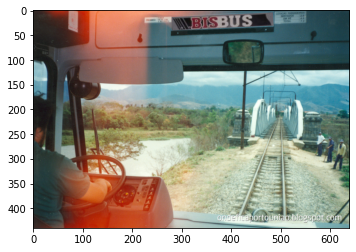

In [ ]:
img = plt.imread("https://i.ibb.co/VNJDTC4/mnist.png")
plt.imshow(img)